# Final Project - Urbanization Data - Debayan Sen

This project looks at urbanization data from the UNICEF [website](https://data.unicef.org/resources/dataset/urbanization-data/). UNICEF stands for the United Nations Children's Fund, and is dedicated to protecting the rights of children across the globe. This dataset looks at the difference between urban and rural areas across the globe and provides indication values of how well they perform according to certain categories. Examples of these categories include "Birth Registration Rate" or "Primary Education Completion Rate". We will be analyzing this data to see trends and conclusions we can draw from the data.

## Loading the data (The first sheet)

The data we are looking at is an excel file containing two sheets. One of these sheets contains data that is separated by three region categories (Total, Urban, and region) while the other is split by wealth quintile (Q1,Q2,Q3,Q4,Q5). We will first look at the data seperated. We will load the data into a dataframe using pandas and name our dataframe "by_residence". 

In [1]:
import pandas as pd

In [2]:
by_residence = pd.read_excel("Urbanization-data.xlsx", sheet_name='by_residence')

## Some Simple EDA

We want to see what this data looks like to see what we are working with. Let's use the head function to see the first few rows.

In [3]:
print(by_residence.head())

     Area name Iso3code  Region                          Indicator name  \
0  Afghanistan      AFG    Asia  At least basic drinking water services   
1  Afghanistan      AFG    Asia  At least basic drinking water services   
2  Afghanistan      AFG    Asia  At least basic drinking water services   
3       Angola      AGO  Africa  At least basic drinking water services   
4       Angola      AGO  Africa  At least basic drinking water services   

  Survey type  Year Residence  Indicator value  Unweighted population  \
0         DHS  2015     Total         0.630880               201833.0   
1         DHS  2015     Urban         0.864950                52023.0   
2         DHS  2015     Rural         0.554475               149810.0   
3         DHS  2015     Total         0.488314                73914.0   
4         DHS  2015     Urban         0.656363                42719.0   

   Weighted population  Small Sample  
0        196048.300606           0.0  
1         48245.901091          

We see that there are 11 columns. The Area Name column contains the country, the Iso3code column contains the code for that country, the region is the continent that country is from, the indicator name is the list of categories we are looking at, the Residence is the type of area, and the indicator value gives a measure of how well a region performs in this area. Lets look at what types of data we are looking at and the unique values in each of the columns. 

In [4]:
print(by_residence.dtypes)
print(by_residence['Area name'].unique())
print(by_residence['Residence'].unique())
print(by_residence['Region'].unique())
print(by_residence['Indicator name'].unique())

Area name                 object
Iso3code                  object
Region                    object
Indicator name            object
Survey type               object
Year                       int64
Residence                 object
Indicator value          float64
Unweighted population    float64
Weighted population      float64
Small Sample             float64
dtype: object
['Afghanistan' 'Angola' 'Armenia' 'Bangladesh' 'Barbados' 'Belarus'
 'Benin' 'Bosnia and Herzegovina' 'Cambodia' 'Cameroon' 'Chad' 'Colombia'
 'Comoros' 'Congo' "Cote d'Ivoire" 'Democratic Republic of Congo'
 'Dominican Republic' 'Egypt' 'El Salvador' 'Eswatini' 'Ethiopia' 'Gabon'
 'Gambia' 'Ghana' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'India' 'Indonesia' 'Kazakhstan' 'Kenya' 'Kosovo*'
 'Kyrgyzstan' 'Lao PDR' 'Lesotho' 'Liberia' 'Malawi' 'Mali' 'Mexico'
 'Moldova' 'Mongolia' 'Montenegro' 'Namibia' 'Nepal' 'Niger' 'Nigeria'
 'Pakistan' 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Rwanda'
 'Sa

We see that the continents that the countries are from include Asia, Africa, Latin America and the Caribbean (South America), and Europe. We can also see some of the countries that are included in this dataset such as Afghanistan, Cambodia, and Peru. 

One thing I want to see is the difference between Urban and Rural areas for the indicator value. It would not make sense to get the mean of all the indicator values in the Urban category and Rural category because these indicator values only make sense relative to the indicator type we are looking at. Thus, we want to be able to see the difference between Urban and Rural indicator values for each indicator type. We can do one example with "At least basic drinking water services" to see a glimpse into what we want to achieve.

In [5]:
water_services = by_residence[by_residence['Indicator name'] == 'At least basic drinking water services']
water_services_urban = water_services[water_services['Residence'] == 'Urban']
water_services_rural = water_services[water_services['Residence'] == 'Rural']
print(water_services_urban['Indicator value'].mean())
print(water_services_rural['Indicator value'].mean())

0.8861292037219035
0.6719995804003758


Here we see one of the differences between Urban and Rural, with Urban being a little higher. We want to see this difference across all the indicator types. The streamlit package can allow us to create an interactive web app to create a grouped bar graph to allow us to visualize these differences. We can use the Heroku app to export our interactive web app to the internet which will be linked [here](https://ma346finalprojecturbanization.herokuapp.com/). The first graph on the website will allow us to visualize these differences. The overall trend we see is that the urban indicator value averages are generally higher than the rural areas. 

##  Data Cleaning 

Before we go further with our analysis, let us see if there are any NAN values present in our dataset.

In [6]:
print(by_residence.isnull().sum())

Area name                  0
Iso3code                   0
Region                     0
Indicator name             0
Survey type                0
Year                       0
Residence                  0
Indicator value            0
Unweighted population    174
Weighted population      168
Small Sample               6
dtype: int64


There are some NAN values, we should drop them to make sure our data is not skewed as some indicator values may not be accurately depicted due to an absent unweighted or weighted population value. 

In [7]:
by_residence = by_residence.dropna()
print(by_residence.isnull().sum())

Area name                0
Iso3code                 0
Region                   0
Indicator name           0
Survey type              0
Year                     0
Residence                0
Indicator value          0
Unweighted population    0
Weighted population      0
Small Sample             0
dtype: int64


## Conducting statistical analysis

The interactive web app allows us to see the difference between urban and rural indicator values across all of indicator types. Next, we will find out if these differences are statistically significant. Can we conclude that the mean between the urban and rural indicator value are truly different? To do this, we will use the scipy package to conduct a t-test between these two means and get a p-value that we will interpret at 5% significance. 

In [8]:
from scipy.stats import stats

In [9]:
def get_ttest(indicator_name): #Function takes an indicator name
    data = by_residence[by_residence['Indicator name'] == indicator_name] #subsets from the given indicator name
    data = data[data['Residence'] != "Total"] #subsets by getting rid of the "Total" category
    urban_only = data[data["Residence"] == "Urban"] #dataframe with Urban values only
    rural_only = data[data["Residence"] == "Rural"] #dataframe with Rural values only
    ttest = stats.ttest_ind(urban_only["Indicator value"], rural_only["Indicator value"], equal_var=False) #conducts t-test
    return ttest



The above function takes an indicator name as an argument and returns a result from a t.test between the indicator values for urban and rural. Let us test this function on "At least basic drinking water services" to see what it returns.

In [10]:
print(get_ttest("At least basic drinking water services"))

Ttest_indResult(statistic=6.765969274080035, pvalue=9.300390188336524e-10)


We want to run this on all the categories. Let us store all the categories in a new dataframe, and then we will make a new column with the respective t-tests run on each category.

In [11]:
ttest_data = pd.DataFrame({'Indicator name':by_residence["Indicator name"].unique()}) #Creates our new dataframe with all the categories
ttest_data["T-test"] = ttest_data['Indicator name'].apply(get_ttest) #applies our function to the indicator categories
print(ttest_data)

                           Indicator name  \
0  At least basic drinking water services   
1      At least basic sanitation services   
2                 Birth Registration Rate   
3                           DPT3 coverage   
4                 HIV Knowledge Young Men   
5               HIV Knowledge Young Women   
6       Primary Education Completion Rate   
7                Skilled Birth Attendants   
8                           Stunting Rate   

                                         T-test  
0    (6.765969274080035, 9.300390188336524e-10)  
1    (3.405840750691231, 0.0008609414081028816)  
2     (2.1736922506683087, 0.03143411693317499)  
3    (1.8974390711237301, 0.060172327537745415)  
4  (3.9855943898437056, 0.00012663254511369044)  
5    (3.429682023455981, 0.0007885800110693229)  
6   (4.309754226507249, 3.4528211821155395e-05)  
7  (5.6458691675405115, 1.5050877682313529e-07)  
8  (-4.033767711944595, 0.00010078988027887174)  


We see the p-values created by the t-test for each of our categories. We see that the p-value for "DPT3 coverage" (which refers to the three doses of diphtheria, tetanus toxoid and pertussis vaccine) is above 0.05, indicating that for this category there is no difference between urban and rural. Let us create a function to see the exact differences in means between these categories. We will apply this function to our ttest_data dataframe. 

In [12]:
def get_difference(indicator_name): #takes in an indicator name
    data = by_residence[by_residence['Indicator name'] == indicator_name] #subsets by that indicator name
    data_urban = data[data["Residence"] == "Urban"]
    data_rural = data[data["Residence"] == "Rural"]
    # get means
    urban_mean = data_urban["Indicator value"].mean()
    rural_mean = data_rural["Indicator value"].mean()
    # get difference then return
    difference = urban_mean - rural_mean
    return difference
    

In [13]:
ttest_data["Difference"] = ttest_data["Indicator name"].apply(get_difference) #creates a new column "Difference"
print(ttest_data)

                           Indicator name  \
0  At least basic drinking water services   
1      At least basic sanitation services   
2                 Birth Registration Rate   
3                           DPT3 coverage   
4                 HIV Knowledge Young Men   
5               HIV Knowledge Young Women   
6       Primary Education Completion Rate   
7                Skilled Birth Attendants   
8                           Stunting Rate   

                                         T-test  Difference  
0    (6.765969274080035, 9.300390188336524e-10)    0.219416  
1    (3.405840750691231, 0.0008609414081028816)    0.169579  
2     (2.1736922506683087, 0.03143411693317499)    0.096360  
3    (1.8974390711237301, 0.060172327537745415)    0.048744  
4  (3.9855943898437056, 0.00012663254511369044)    0.109607  
5    (3.429682023455981, 0.0007885800110693229)    0.094404  
6   (4.309754226507249, 3.4528211821155395e-05)    0.146422  
7  (5.6458691675405115, 1.5050877682313529e-07)    0.

Seeing the difference in means confirms our result as the difference in means for DPT3 coverage is the smallest. This most means that between urban and rural areas for this dataset there is not a statistically significant difference for DPT3 coverage between urban and rural areas.  

## Looking at disparities in Urban areas

We see that there are differences between urban and rural areas, with indicators seeeming to indicate more preferable indicator scores for Urban areas overall. However, within just the Urban category alone, what are the scores like across the various indicators? We can create a bar graph to visualize this difference. First we subset our original by_residence dataframe to include only Urban areas. 

In [14]:
data_urban = by_residence[by_residence["Residence"] == "Urban"] #dataframe with only Urban residence areas
print(data_urban.head())

      Area name Iso3code                           Region  \
1   Afghanistan      AFG                             Asia   
4        Angola      AGO                           Africa   
7       Armenia      ARM                             Asia   
10   Bangladesh      BGD                             Asia   
13     Barbados      BRB  Latin America and the Caribbean   

                            Indicator name Survey type  Year Residence  \
1   At least basic drinking water services         DHS  2015     Urban   
4   At least basic drinking water services         DHS  2015     Urban   
7   At least basic drinking water services         DHS  2015     Urban   
10  At least basic drinking water services         DHS  2014     Urban   
13  At least basic drinking water services        MICS  2012     Urban   

    Indicator value  Unweighted population  Weighted population  Small Sample  
1          0.864950                52023.0         48245.901091           0.0  
4          0.656363         

Next we import the matplotlib.pyplot and numpy modules to create a bargraph. We will go through each of the indicators and graph the mean indicator score for each category. 

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
indicator_list = by_residence["Indicator name"].unique().tolist() #list of all the indicator names

urban_means = [] #empty list to store the means in 

for i in indicator_list:
    category = data_urban[data_urban["Indicator name"] == i]
    urban_means.append(category["Indicator value"].mean())



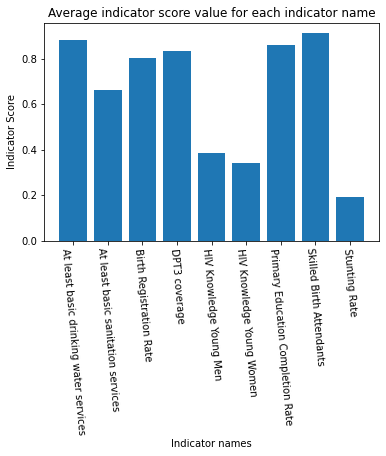

In [17]:
plt.bar(indicator_list, urban_means)
plt.title("Average indicator score value for each indicator name")
plt.ylabel("Indicator Score")
plt.xlabel("Indicator names")
plt.xticks(rotation = -85)
plt.show()

We see here that disparities exist across categories between the urban residences. 

# Looking at wealth quintiles (Second sheet)

Moving on to the second sheet in this excel file, this is similar to the previous sheet in that it has urban versus rural, but instead each country name appears ten times to represent each wealth quintile. There are five wealth quintiles (Q1, Q2, Q3, Q4, and Q5) and there are indicator values for each one. There are five wealth quintiles for each country in the rural and urban residence areas, which means a country shows up 10 times to account for each of these quintiles. 

In [18]:
by_res_wealth = pd.read_excel("Urbanization-data.xlsx", sheet_name='by_residence_wealthquintiles')
print(by_res_wealth.head())

     Area name Iso3code Region                          Indicator name  \
0  Afghanistan      AFG   Asia  At least basic drinking water services   
1  Afghanistan      AFG   Asia  At least basic drinking water services   
2  Afghanistan      AFG   Asia  At least basic drinking water services   
3  Afghanistan      AFG   Asia  At least basic drinking water services   
4  Afghanistan      AFG   Asia  At least basic drinking water services   

  Survey type  Year Residence Wealth quintile  Indicator value  \
0         DHS  2015     Urban              Q1         0.712094   
1         DHS  2015     Urban              Q2         0.822749   
2         DHS  2015     Urban              Q3         0.905302   
3         DHS  2015     Urban              Q4         0.941093   
4         DHS  2015     Urban              Q5         0.942910   

   Unweighted population  Weighted population\  Small Sample  
0                18763.0           9928.450283           0.0  
1                10164.0        

I would like to see the difference between Urban and Rural indicator scores across these different quintiles and across different indicator categories. Once again, streamlit can help us do this. In the [interactive web app](https://ma346finalprojecturbanization.herokuapp.com/), the second graph has the average urban and rural indicator scores across the different quintiles in a selected indicator category. The overall trend we see is that the urban indicator value averages are generally higher than the rural areas. 

## Conducting another statistical analysis

We will conduct a statistical analysis with a t-test again to see whether the difference between urban and rural indicator value for each wealth quintile is truly significant. This will require many t-tests to be run at once, therefore to make this easier, we will create a new data with each category and wealth quintile, and then run a function on this dataframe to produce a new column with all the t-tests. First we will create a list with all the wealth quintiles.

In [19]:
quintiles = by_res_wealth["Wealth quintile"].unique().tolist()

Next we will create a dictionary where the keys will be the indicators and the values will be the the wealth quintiles. 

In [20]:
dict_data = dict.fromkeys(indicator_list, quintiles) 
print(dict_data)

{'At least basic drinking water services': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], 'At least basic sanitation services': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], 'Birth Registration Rate': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], 'DPT3 coverage': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], 'HIV Knowledge Young Men': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], 'HIV Knowledge Young Women': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], 'Primary Education Completion Rate': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], 'Skilled Birth Attendants': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], 'Stunting Rate': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']}


We can turn this dictionary into a dataframe so that we can perform statistical analysis on it. We will name our dataframe "quintile_ttest".

In [21]:
quintile_ttest = pd.DataFrame.from_dict(dict_data)
print(quintile_ttest)

  At least basic drinking water services At least basic sanitation services  \
0                                     Q1                                 Q1   
1                                     Q2                                 Q2   
2                                     Q3                                 Q3   
3                                     Q4                                 Q4   
4                                     Q5                                 Q5   

  Birth Registration Rate DPT3 coverage HIV Knowledge Young Men  \
0                      Q1            Q1                      Q1   
1                      Q2            Q2                      Q2   
2                      Q3            Q3                      Q3   
3                      Q4            Q4                      Q4   
4                      Q5            Q5                      Q5   

  HIV Knowledge Young Women Primary Education Completion Rate  \
0                        Q1                              

This dataframe is not structured in a way we can run an analysis on it. We would ideally like one column to have all the indicator categories and another column to have all the corresponding wealth quintiles. We can use the stack function that pandas provides to do this. 

In [22]:
quintile_ttest_stacked = quintile_ttest.stack()
print(quintile_ttest_stacked)

0  At least basic drinking water services    Q1
   At least basic sanitation services        Q1
   Birth Registration Rate                   Q1
   DPT3 coverage                             Q1
   HIV Knowledge Young Men                   Q1
   HIV Knowledge Young Women                 Q1
   Primary Education Completion Rate         Q1
   Skilled Birth Attendants                  Q1
   Stunting Rate                             Q1
1  At least basic drinking water services    Q2
   At least basic sanitation services        Q2
   Birth Registration Rate                   Q2
   DPT3 coverage                             Q2
   HIV Knowledge Young Men                   Q2
   HIV Knowledge Young Women                 Q2
   Primary Education Completion Rate         Q2
   Skilled Birth Attendants                  Q2
   Stunting Rate                             Q2
2  At least basic drinking water services    Q3
   At least basic sanitation services        Q3
   Birth Registration Rate              

This dataframe will be much easier to apply a function to. However, we should reset the index and find the column names (which we currently cannot see) to work with our data. Let us reset the index and also print the columns of this new dataframe. 

In [23]:
quintile_ttest_stacked = quintile_ttest_stacked.reset_index()
for col in quintile_ttest_stacked.columns:
    print(col)
# print(quintile_ttest_stacked[0])

level_0
level_1
0


We can now create our function. This function will take two arguments, an indicator name and wealth quintile, and then subset the data accordingly such that we are only looking at the data with the inidicator category and quintile, then perform a t-test based on the urban and rural data respectively. 

In [24]:
def ttest_for_quintile(indicator_name, quintile): #takes two arguments, indicator name and the quintile
    data = by_res_wealth[by_res_wealth["Indicator name"] == indicator_name] #subsets by indicator name
    data = data[data["Wealth quintile"] == quintile] #subsets by quintile
    urban_only = data[data["Residence"] == "Urban"]
    rural_only = data[data["Residence"] == "Rural"]
    result = stats.ttest_ind(urban_only["Indicator value"], rural_only["Indicator value"], equal_var=False) #returns t test 
    return result

We can now apply our function ttest_for_quintile to our dataframe using a for loop. We will keep our results in a list "new_column" which then we will add as a column named "T-test".

In [25]:
new_column = [] #empty list where we will keep our results
for index, row in quintile_ttest_stacked.iterrows():
    new_column.append(ttest_for_quintile(row['level_1'], row[0])) #goes through the dataframe and applies ttest_for_quintile function
#     print(row['level_1'], row[0])

# print(new_column_stacked)
# print(len(new_column_stacked))

In [26]:
quintile_ttest_stacked['T-test'] = new_column
print(quintile_ttest_stacked)

    level_0                                 level_1   0  \
0         0  At least basic drinking water services  Q1   
1         0      At least basic sanitation services  Q1   
2         0                 Birth Registration Rate  Q1   
3         0                           DPT3 coverage  Q1   
4         0                 HIV Knowledge Young Men  Q1   
5         0               HIV Knowledge Young Women  Q1   
6         0       Primary Education Completion Rate  Q1   
7         0                Skilled Birth Attendants  Q1   
8         0                           Stunting Rate  Q1   
9         1  At least basic drinking water services  Q2   
10        1      At least basic sanitation services  Q2   
11        1                 Birth Registration Rate  Q2   
12        1                           DPT3 coverage  Q2   
13        1                 HIV Knowledge Young Men  Q2   
14        1               HIV Knowledge Young Women  Q2   
15        1       Primary Education Completion Rate  Q2 

We would like to see which p-values are above or below 0.05 based on our results. Let us see the type of variable each value is in the "T-test" column. 

In [27]:
print(type(quintile_ttest_stacked["T-test"][0]))

<class 'scipy.stats.stats.Ttest_indResult'>


Currently the type of each value in the column is a class specific to the scipy module. We will not be able to access our specific p-values like this. We can turn this into a tuple using the tuple function that python provides. Turning each row in the "T-test" column into a tuple will allow us to access the p-value. 

In [28]:
def make_tuple(input): #function that returns a tuple of the input given
    x = tuple(input)
    return x
quintile_ttest_stacked["T-test"] = quintile_ttest_stacked["T-test"].apply(make_tuple) #makes the column into tuples

Next we create a function that we will apply to our "T-test" column where if the p-value is greater than 0.05, we will return "No difference" and elsewise it will return "Difference". This will show us if there is truly a difference between urban and rural areas for each of the rows. 

In [29]:
def difference(input):
    if input[1] > 0.05:
        return "No difference"
    else:
        return "Difference"
    

We will create a new column named "Difference?" which will show us the results of our T-test and if there is a difference between the average indicator values between urban and rural areas. 

In [30]:
quintile_ttest_stacked['Difference?'] = quintile_ttest_stacked["T-test"].apply(difference)
print(quintile_ttest_stacked)

    level_0                                 level_1   0  \
0         0  At least basic drinking water services  Q1   
1         0      At least basic sanitation services  Q1   
2         0                 Birth Registration Rate  Q1   
3         0                           DPT3 coverage  Q1   
4         0                 HIV Knowledge Young Men  Q1   
5         0               HIV Knowledge Young Women  Q1   
6         0       Primary Education Completion Rate  Q1   
7         0                Skilled Birth Attendants  Q1   
8         0                           Stunting Rate  Q1   
9         1  At least basic drinking water services  Q2   
10        1      At least basic sanitation services  Q2   
11        1                 Birth Registration Rate  Q2   
12        1                           DPT3 coverage  Q2   
13        1                 HIV Knowledge Young Men  Q2   
14        1               HIV Knowledge Young Women  Q2   
15        1       Primary Education Completion Rate  Q2 

We see there are no differences between Urban and Rural regions for Q1 Birth registration rates, Q2 DPT3 Coverage, Q3 DPT3 Coverage, Q4 DPT3 Coverage, and Q5 DPT3 Coverage. This supports our observations from the previous sheet that there seems to be not too much difference in DPT coverage between urban and rural areas. 

## Conclusion

Between both sheets of data, we see there seems to be an “Urban advantage” where the average indicator scores are higher than the rural indicator scores except for in the DPT3 coverage area. This means that DPT3 vaccination efforts are doing well in reaching rural areas, however, there needs to be an increased focus in providing more resources to rural areas to increase access to better quality education, water sources, and health services. 